In [28]:
import matplotlib.pyplot as plt
import numpy as np

z =  0.014440000000000008
Final C/O =  1.1229232013266774
X(Sr) final / X(Sr) solar =  8.043103598197773
X(Ba) final / X(Ba) solar =  8.02189899228009
Final Core mass =  0.6415959611818854 M$_{\odot}$
Number of pulses =  19
Number of dredges =  6


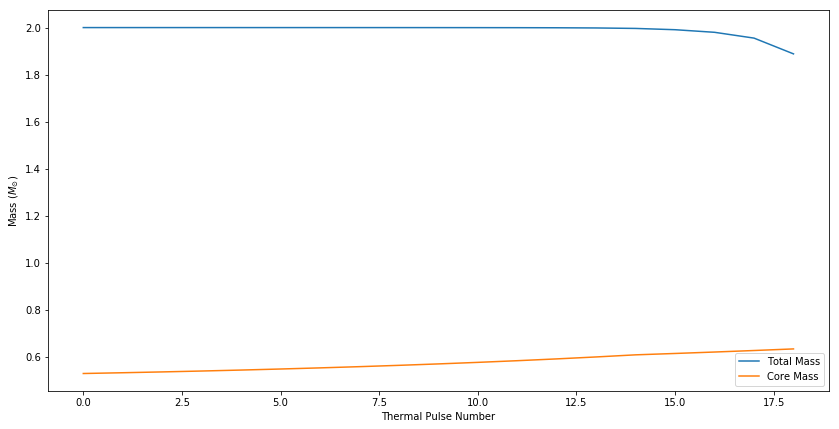

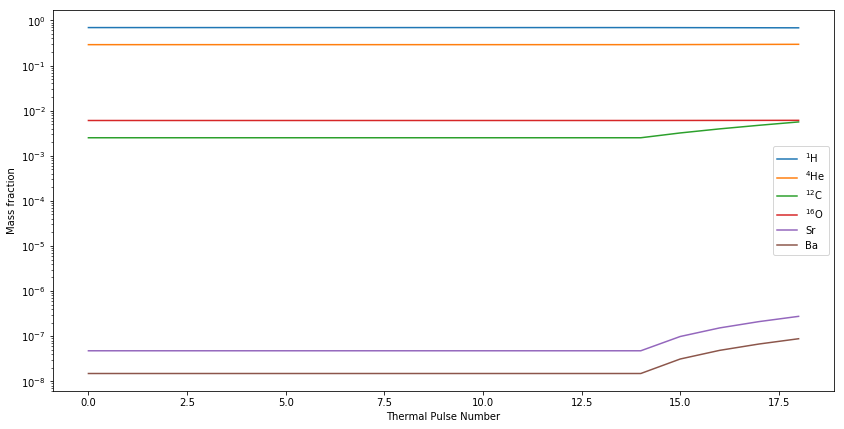

In [146]:
#Some constants
c = 2.99792*10**10
L_sun = 3.828*10**33
msun = 1.989*10**33
tyear = (365.25*24*60*60)




#Question 1
epsilon = c**2 * (4.0026-4.*1.0078)/(4.*1.0078) * L_sun**-1 * tyear**-1 * msun 
q = 1/epsilon

#How many steps we want to do
n= 100

#initialise the arrays that will hold our values
mc = np.zeros(n)
m = np.zeros(n)
menv = np.zeros(n)
poccur = np.zeros(n)

#Initial mass of the star (in msun)
m[0] = 2.0

#Composition array, how many steps we are doing by how many elements we have
x = np.zeros((n,6))

#Initial composition, in mass fraction
x[0,:] = [6.9499E-1, 2.9057E-1, 2.5055E-03, 6.0480E-03, 4.7352E-8, 1.4839E-08]

z = 1-6.9499E-1-2.9057E-1
print('z = ', z )

# Intershell abundances
# From s process lectures, A values from Apslund et al. 2009
# log10(XBastar/XBasolar) = 2.6 (as star is solar metallicity)
# XBasolar = 10**(A(Ba)-12) * Xsolar * M(Ba)
# solve for XBastar
xsrshell = 10**2.6*10**(2.87-12)*0.7*87.62
xbashell = 10**2.6*10**(2.18-12)*0.7*137.33


#Composition of the shell in mass fraction (unchanging?)
xshell = np.array([0., 0.70, 0.25, 0.01, xsrshell, xbashell])



#Our time step (time between pulses)
dt = 10**5


# variables so we can see how many dredge ups occur and how long the pulsations last
n_third_dredge = 0

i_stop = 0

# Initial core mass
mc[0] = 0.53

#Minimum core mass for 3rd dredge up to occur
mcmin = 0.608


for i in range(1,n):
    
    
    #Determining delta Mc
    
    #Luminosity from (5)
    L = 59250*(mc[i-1] - 0.490)
    

    
    #dmc/dt from (3)
    dmc = (-q*L/x[i-1,0])*dt


    # If the current core mass is greater then the minimum core mass for 3rd dredge up to occur
    # Then the core mass can change (lambda =/= 0.)
    if (mc[i-1] > mcmin):
        l = 0.4
        n_third_dredge = n_third_dredge + 1
    else:
        l = 0
    
    #Delta M dredge up from (6) where l is lambda
    dmd = l*dmc

    #Changes to the core mass by applying (7)
    mc[i] = mc[i-1] + dmc - dmd


    #Radius of AGB in solar radii from (8)
    Ragb = 1.125*m[i-1]**(-0.33)*(L**0.4 + 0.383*L**(0.76))
    

    #Pulsation period of AGB from (10)
    p = 10**(-2.07 + 1.94*np.log10(Ragb) - 0.9*np.log10(m[i-1]))
    poccur[i] = p


    #If pulsation period greater than 500 days then use (11) otherwise use (9)
    #to determine the chaqnge in change total mass of the star. Converted to cgs
    
    if (p > 500):
        dmdt = L*L_sun/(c*15*10**5) * tyear
    else:
        dmdt = 10**(-11.4 + 0.0125*p) *msun
        
    
    #Change the core mass in cgs then converted to 
    m[i] = (msun * m[i-1] - dmdt * dt)/ msun
    
    
    #Mass of the envelope is defined as the total mass minus the core mass
    menv[i] = m[i] - mc[i]

    #Changes to composition of the elements in the star from (12)
    x[i,:] = (x[i-1,:]*(menv[i] - dmd) + dmd * xshell[:])/menv[i]

    
    # Our stopping condition
    # Not physical for the core mass to be greater than the star mass so stop if this happens
    if(mc[i] - m[i] > 0):
        #set the stopping time step to be the step before the core mass was greater
        #than the total mass
        i_stop = i-1
        break
        
# Straight forward to understand        
final_co = x[i_stop,2]/x[i_stop,3]
print('Final C/O = ', final_co)


#Plotting of the results

plt.figure(figsize = (14,7))
plt.plot(m[0:i_stop], label = 'Total Mass')
plt.plot(mc[0:i_stop], label = 'Core Mass')
plt.ylabel(r'Mass $\left( M_{\odot} \right)$')
plt.xlabel('Thermal Pulse Number')
plt.legend(loc = 'best')


plt.figure(figsize = (14,7))


plt.plot(x[0:i_stop,0], label = r'$^{1}$H')
plt.plot(x[0:i_stop,1], label = r'$^{4}$He')
plt.plot(x[0:i_stop,2], label = r'$^{12}$C')
plt.plot(x[0:i_stop,3], label = r'$^{16}$O')
plt.plot(x[0:i_stop,4], label = 'Sr')
plt.plot(x[0:i_stop,5], label = 'Ba')

plt.yscale('log')
plt.ylabel('Mass fraction')
plt.xlabel('Thermal Pulse Number')
plt.legend(loc = 'best')


print('X(Sr) final / X(Sr) solar = ', x[i_stop,4]/solarsr)
print('X(Ba) final / X(Ba) solar = ', x[i_stop,5]/solarba)

print('Final Core mass = ', mc[i_stop], r'M$_{\odot}$')
print('Number of pulses = ', i_stop)
print('Number of dredges = ', n_third_dredge)

m1 = m
mc1 = mc
x1 = x

i_stop1 = i_stop
poccur1 = poccur

z =  0.014440000000000008
Final C/O =  3.2363858830253647
X(Sr) final / X(Sr) solar =  21.361483838373665
X(Ba) final / X(Ba) solar =  21.341003244300136
Final Core mass =  0.6306053629163607 M$_{\odot}$
Number of pulses =  22
Number of dredges =  9


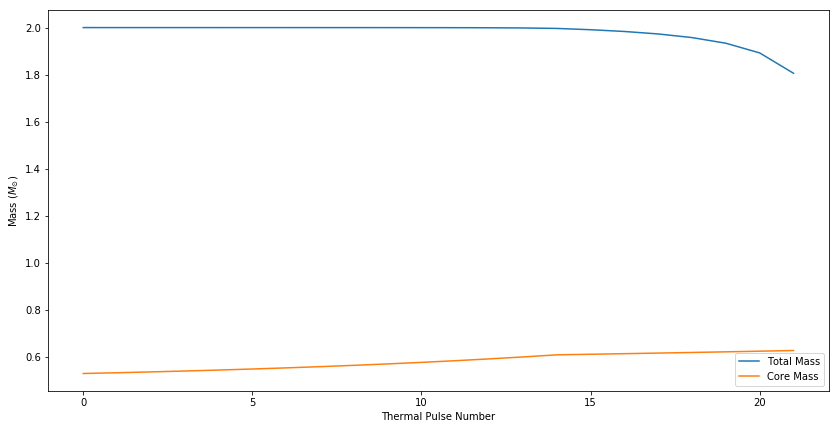

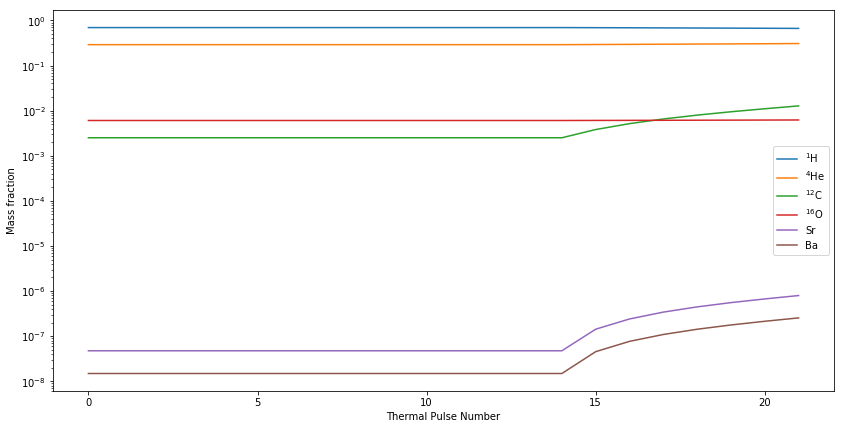

In [147]:
#Some constants
c = 2.99792*10**10
L_sun = 3.828*10**33
msun = 1.989*10**33
tyear = (365.25*24*60*60)




#Question 1
epsilon = c**2 * (4.0026-4.*1.0078)/(4.*1.0078) * L_sun**-1 * tyear**-1 * msun 
q = 1/epsilon

#How many steps we want to do
n= 100

#initialise the arrays that will hold our values
mc = np.zeros(n)
m = np.zeros(n)
menv = np.zeros(n)
poccur = np.zeros(n)

#Initial mass of the star (in msun)
m[0] = 2.0

#Composition array, how many steps we are doing by how many elements we have
x = np.zeros((n,6))

#Initial composition, in mass fraction
x[0,:] = [6.9499E-1, 2.9057E-1, 2.5055E-03, 6.0480E-03, 4.7352E-8, 1.4839E-08]

z = 1-6.9499E-1-2.9057E-1
print('z = ', z )

# Intershell abundances
# From s process lectures, A values from Apslund et al. 2009
# log10(XBastar/XBasolar) = 2.6 (as star is solar metallicity)
# XBasolar = 10**(A(Ba)-12) * Xsolar * M(Ba)
# solve for XBastar
xsrshell = 10**2.6*10**(2.87-12)*0.7*87.62
xbashell = 10**2.6*10**(2.18-12)*0.7*137.33


#Composition of the shell in mass fraction (unchanging?)
xshell = np.array([0., 0.70, 0.25, 0.01, xsrshell, xbashell])



#Our time step (time between pulses)
dt = 10**5


# variables so we can see how many dredge ups occur and how long the pulsations last
n_third_dredge = 0

i_stop = 0

# Initial core mass
mc[0] = 0.53

#Minimum core mass for 3rd dredge up to occur
mcmin = 0.608


for i in range(1,n):
    
    
    #Determining delta Mc
    
    #Luminosity from (5)
    L = 59250*(mc[i-1] - 0.490)
    

    
    #dmc/dt from (3)
    dmc = (-q*L/x[i-1,0])*dt


    # If the current core mass is greater then the minimum core mass for 3rd dredge up to occur
    # Then the core mass can change (lambda =/= 0.)
    if (mc[i-1] > mcmin):
        l = 0.75
        n_third_dredge = n_third_dredge + 1
    else:
        l = 0
    
    #Delta M dredge up from (6) where l is lambda
    dmd = l*dmc

    #Changes to the core mass by applying (7)
    mc[i] = mc[i-1] + dmc - dmd


    #Radius of AGB in solar radii from (8)
    Ragb = 1.125*m[i-1]**(-0.33)*(L**0.4 + 0.383*L**(0.76))
    

    #Pulsation period of AGB from (10)
    p = 10**(-2.07 + 1.94*np.log10(Ragb) - 0.9*np.log10(m[i-1]))
    poccur[i] = p


    #If pulsation period greater than 500 days then use (11) otherwise use (9)
    #to determine the chaqnge in change total mass of the star. Converted to cgs
    
    if (p > 500):
        dmdt = L*L_sun/(c*15*10**5) * tyear
    else:
        dmdt = 10**(-11.4 + 0.0125*p) *msun
        
    
    #Change the core mass in cgs then converted to 
    m[i] = (msun * m[i-1] - dmdt * dt)/ msun
    
    
    #Mass of the envelope is defined as the total mass minus the core mass
    menv[i] = m[i] - mc[i]

    #Changes to composition of the elements in the star from (12)
    x[i,:] = (x[i-1,:]*(menv[i] - dmd) + dmd * xshell[:])/menv[i]

    
    # Our stopping condition
    # Not physical for the core mass to be greater than the star mass so stop if this happens
    if(mc[i] - m[i] > 0):
        #set the stopping time step to be the step before the core mass was greater
        #than the total mass
        i_stop = i-1
        break
        
# Straight forward to understand        
final_co = x[i_stop,2]/x[i_stop,3] * 16/12
print('Final C/O = ', final_co)


#Plotting of the results

plt.figure(figsize = (14,7))
plt.plot(m[0:i_stop], label = 'Total Mass')
plt.plot(mc[0:i_stop], label = 'Core Mass')
plt.ylabel(r'Mass $\left( M_{\odot} \right)$')
plt.xlabel('Thermal Pulse Number')
plt.legend(loc = 'best')


plt.figure(figsize = (14,7))


plt.plot(x[0:i_stop,0], label = r'$^{1}$H')
plt.plot(x[0:i_stop,1], label = r'$^{4}$He')
plt.plot(x[0:i_stop,2], label = r'$^{12}$C')
plt.plot(x[0:i_stop,3], label = r'$^{16}$O')
plt.plot(x[0:i_stop,4], label = 'Sr')
plt.plot(x[0:i_stop,5], label = 'Ba')

plt.yscale('log')
plt.ylabel('Mass fraction')
plt.xlabel('Thermal Pulse Number')
plt.legend(loc = 'best')


print('X(Sr) final / X(Sr) solar = ', x[i_stop,4]/solarsr)
print('X(Ba) final / X(Ba) solar = ', x[i_stop,5]/solarba)

print('Final Core mass = ', mc[i_stop], r'M$_{\odot}$')
print('Number of pulses = ', i_stop)
print('Number of dredges = ', n_third_dredge)

m2 = m
mc2 = mc
x2 = x

i_stop2 = i_stop
poccur2 = poccur

z =  0.014440000000000008
Final C/O =  2.2096574378689273
X(Sr) final / X(Sr) solar =  13.429929869045132
X(Ba) final / X(Ba) solar =  13.409018100991526
Final Core mass =  0.6427536156119857 M$_{\odot}$
Number of pulses =  21
Number of dredges =  11


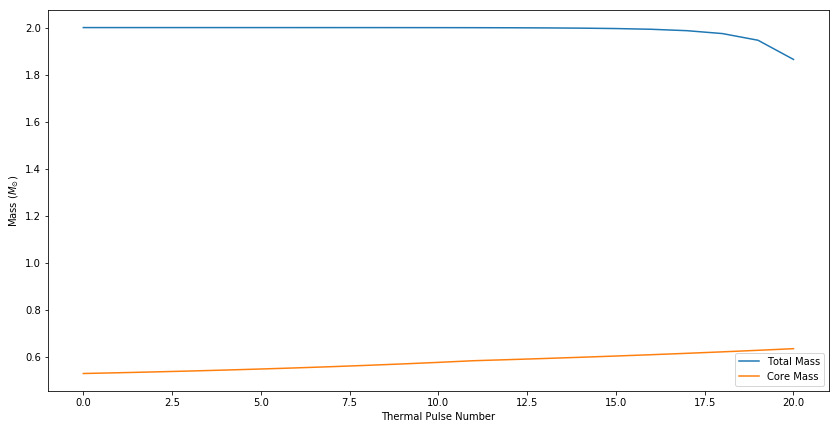

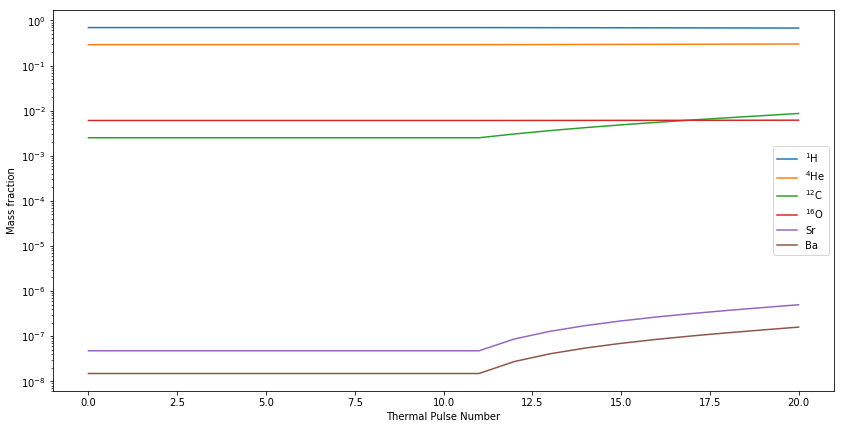

In [148]:
#Some constants
c = 2.99792*10**10
L_sun = 3.828*10**33
msun = 1.989*10**33
tyear = (365.25*24*60*60)




#Question 1
epsilon = c**2 * (4.0026-4.*1.0078)/(4.*1.0078) * L_sun**-1 * tyear**-1 * msun 
q = 1/epsilon

#How many steps we want to do
n= 100

#initialise the arrays that will hold our values
mc = np.zeros(n)
m = np.zeros(n)
menv = np.zeros(n)
poccur = np.zeros(n)

#Initial mass of the star (in msun)
m[0] = 2.0

#Composition array, how many steps we are doing by how many elements we have
x = np.zeros((n,6))

#Initial composition, in mass fraction
x[0,:] = [6.9499E-1, 2.9057E-1, 2.5055E-03, 6.0480E-03, 4.7352E-8, 1.4839E-08]

z = 1-6.9499E-1-2.9057E-1
print('z = ', z )

# Intershell abundances
# From s process lectures, A values from Apslund et al. 2009
# log10(XBastar/XBasolar) = 2.6 (as star is solar metallicity)
# XBasolar = 10**(A(Ba)-12) * Xsolar * M(Ba)
# solve for XBastar
xsrshell = 10**2.6*10**(2.87-12)*0.7*87.62
xbashell = 10**2.6*10**(2.18-12)*0.7*137.33


#Composition of the shell in mass fraction (unchanging?)
xshell = np.array([0., 0.70, 0.25, 0.01, xsrshell, xbashell])



#Our time step (time between pulses)
dt = 10**5


# variables so we can see how many dredge ups occur and how long the pulsations last
n_third_dredge = 0

i_stop = 0

# Initial core mass
mc[0] = 0.53

#Minimum core mass for 3rd dredge up to occur
mcmin = 0.58


for i in range(1,n):
    
    
    #Determining delta Mc
    
    #Luminosity from (5)
    L = 59250*(mc[i-1] - 0.490)
    

    
    #dmc/dt from (3)
    dmc = (-q*L/x[i-1,0])*dt


    # If the current core mass is greater then the minimum core mass for 3rd dredge up to occur
    # Then the core mass can change (lambda =/= 0.)
    if (mc[i-1] > mcmin):
        l = 0.4
        n_third_dredge = n_third_dredge + 1
    else:
        l = 0
    
    #Delta M dredge up from (6) where l is lambda
    dmd = l*dmc

    #Changes to the core mass by applying (7)
    mc[i] = mc[i-1] + dmc - dmd


    #Radius of AGB in solar radii from (8)
    Ragb = 1.125*m[i-1]**(-0.33)*(L**0.4 + 0.383*L**(0.76))
    

    #Pulsation period of AGB from (10)
    p = 10**(-2.07 + 1.94*np.log10(Ragb) - 0.9*np.log10(m[i-1]))
    poccur[i] = p

    #If pulsation period greater than 500 days then use (11) otherwise use (9)
    #to determine the chaqnge in change total mass of the star. Converted to cgs
    
    if (p > 500):
        dmdt = L*L_sun/(c*15*10**5) * tyear

    else:
        dmdt = 10**(-11.4 + 0.0125*p) *msun
        
    
    #Change the core mass in cgs then converted to 
    m[i] = (msun * m[i-1] - dmdt * dt)/ msun
    
    
    #Mass of the envelope is defined as the total mass minus the core mass
    menv[i] = m[i] - mc[i]

    #Changes to composition of the elements in the star from (12)
    x[i,:] = (x[i-1,:]*(menv[i] - dmd) + dmd * xshell[:])/menv[i]

    
    # Our stopping condition
    # Not physical for the core mass to be greater than the star mass so stop if this happens
    if(mc[i] - m[i] > 0):
        #set the stopping time step to be the step before the core mass was greater
        #than the total mass
        i_stop = i-1
        break
        
# Straight forward to understand        
final_co = x[i_stop,2]/x[i_stop,3] * 16/12
print('Final C/O = ', final_co)


#Plotting of the results

plt.figure(figsize = (14,7))
plt.plot(m[0:i_stop], label = 'Total Mass')
plt.plot(mc[0:i_stop], label = 'Core Mass')
plt.ylabel(r'Mass $\left( M_{\odot} \right)$')
plt.xlabel('Thermal Pulse Number')
plt.legend(loc = 'best')


plt.figure(figsize = (14,7))


plt.plot(x[0:i_stop,0], label = r'$^{1}$H')
plt.plot(x[0:i_stop,1], label = r'$^{4}$He')
plt.plot(x[0:i_stop,2], label = r'$^{12}$C')
plt.plot(x[0:i_stop,3], label = r'$^{16}$O')
plt.plot(x[0:i_stop,4], label = 'Sr')
plt.plot(x[0:i_stop,5], label = 'Ba')

plt.yscale('log')
plt.ylabel('Mass fraction')
plt.xlabel('Thermal Pulse Number')
plt.legend(loc = 'best')


print('X(Sr) final / X(Sr) solar = ', x[i_stop,4]/solarsr)
print('X(Ba) final / X(Ba) solar = ', x[i_stop,5]/solarba)

print('Final Core mass = ', mc[i_stop], r'M$_{\odot}$')
print('Number of pulses = ', i_stop)
print('Number of dredges = ', n_third_dredge)

m3 = m
mc3 = mc
x3 = x

i_stop3 = i_stop
poccur3 = poccur

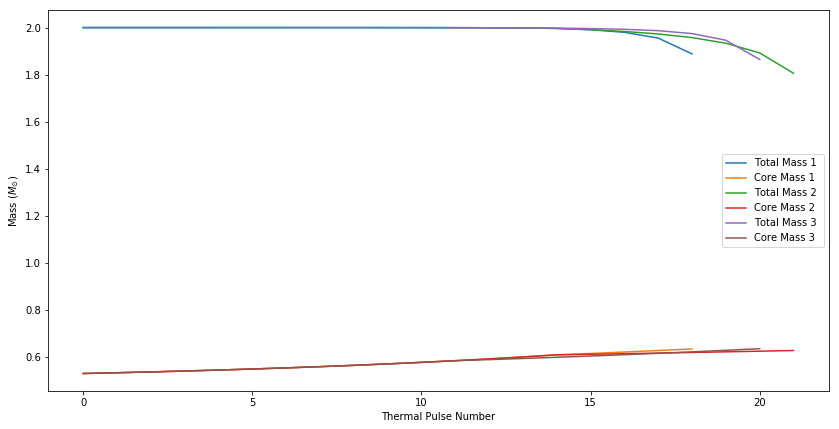

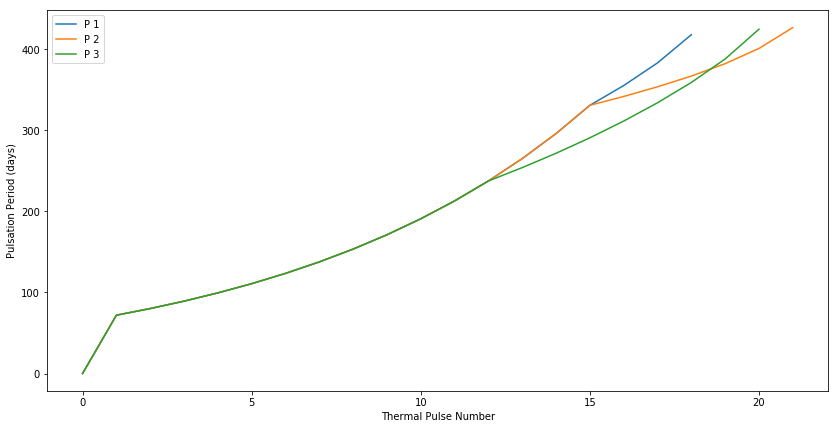

In [156]:
plt.figure(figsize = (14,7))
plt.plot(m1[0:i_stop1], label = 'Total Mass 1 ')
plt.plot(mc1[0:i_stop1], label = 'Core Mass 1')

plt.plot(m2[0:i_stop2], label = 'Total Mass 2 ')
plt.plot(mc2[0:i_stop2], label = 'Core Mass 2')

plt.plot(m3[0:i_stop3], label = 'Total Mass 3 ')
plt.plot(mc3[0:i_stop3], label = 'Core Mass 3')

plt.ylabel(r'Mass $\left( M_{\odot} \right)$')
plt.xlabel('Thermal Pulse Number')
plt.legend(loc = 'best')
           
           
           
plt.figure(figsize = (14,7))
plt.plot(poccur1[0:i_stop1], label = 'P 1')
plt.plot(poccur2[0:i_stop2], label = 'P 2')
plt.plot(poccur3[0:i_stop3], label = 'P 3')
plt.ylabel(r'Pulsation Period (days)')
plt.xlabel('Thermal Pulse Number')
plt.legend(loc = 'best')

z =  0.014440000000000008
Final C/O =  37.31107690309411
X(Sr) final / X(Sr) solar =  484.6324125151086
X(Ba) final / X(Ba) solar =  484.63711618769247
Final Core mass =  0.7272993791145593 M$_{\odot}$
Number of pulses =  28
Number of dredges =  15


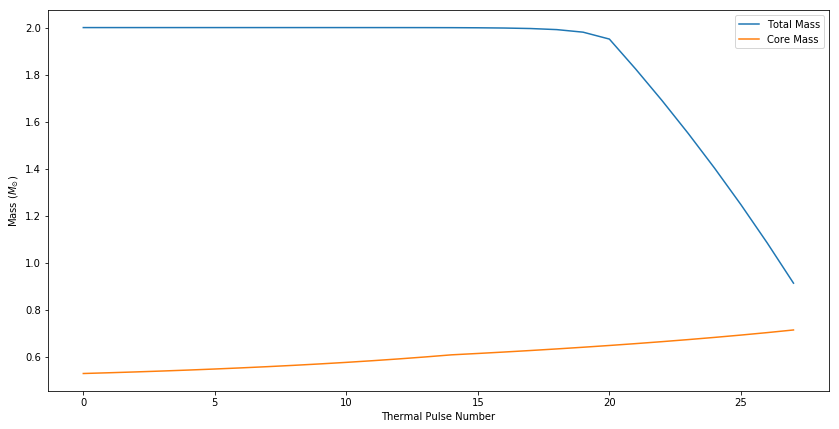

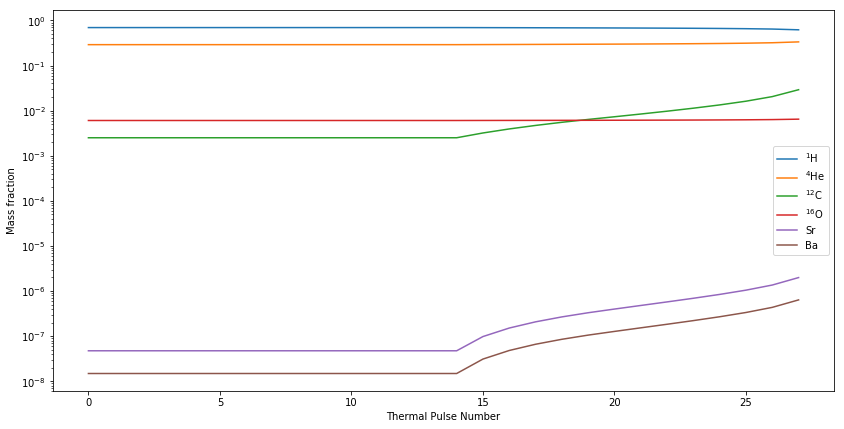

In [150]:
#Some constants
c = 2.99792*10**10
L_sun = 3.828*10**33
msun = 1.989*10**33
tyear = (365.25*24*60*60)




#Question 1
epsilon = c**2 * (4.0026-4.*1.0078)/(4.*1.0078) * L_sun**-1 * tyear**-1 * msun 
q = 1/epsilon

#How many steps we want to do
n= 100

#initialise the arrays that will hold our values
mc = np.zeros(n)
m = np.zeros(n)
menv = np.zeros(n)
poccur = np.zeros(n)

#Initial mass of the star (in msun)
m[0] = 2.0

#Composition array, how many steps we are doing by how many elements we have
x = np.zeros((n,6))

#Initial composition, in mass fraction
x[0,:] = [6.9499E-1, 2.9057E-1, 2.5055E-03, 6.0480E-03, 4.7352E-8, 1.4839E-08]

z = 1-6.9499E-1-2.9057E-1
print('z = ', z )

# Intershell abundances
# From s process lectures, A values from Apslund et al. 2009
# log10(XBastar/XBasolar) = 2.6 (as star is solar metallicity)
# XBasolar = 10**(A(Ba)-12) * Xsolar * M(Ba)
# solve for XBastar
xsrshell = 10**2.6*10**(2.87-12)*0.7*87.62
xbashell = 10**2.6*10**(2.18-12)*0.7*137.33


#Composition of the shell in mass fraction (unchanging?)
xshell = np.array([0., 0.70, 0.25, 0.01, xsrshell, xbashell])



#Our time step (time between pulses)
dt = 10**5


# variables so we can see how many dredge ups occur and how long the pulsations last
n_third_dredge = 0

i_stop = 0

# Initial core mass
mc[0] = 0.53

#Minimum core mass for 3rd dredge up to occur
mcmin = 0.608


for i in range(1,n):
    
    
    #Determining delta Mc
    
    #Luminosity from (5)
    L = 59250*(mc[i-1] - 0.490)
    

    
    #dmc/dt from (3)
    dmc = (-q*L/x[i-1,0])*dt


    # If the current core mass is greater then the minimum core mass for 3rd dredge up to occur
    # Then the core mass can change (lambda =/= 0.)
    if (mc[i-1] > mcmin):
        l = 0.4
        n_third_dredge = n_third_dredge + 1
    else:
        l = 0
    
    #Delta M dredge up from (6) where l is lambda
    dmd = l*dmc

    #Changes to the core mass by applying (7)
    mc[i] = mc[i-1] + dmc - dmd


    #Radius of AGB in solar radii from (8)
    Ragb = 1.125*m[i-1]**(-0.33)*(L**0.4 + 0.383*L**(0.76))
    

    #Pulsation period of AGB from (10)
    p = 10**(-2.07 + 1.94*np.log10(Ragb) - 0.9*np.log10(m[i-1]))
    poccur[i] = p

    #If pulsation period greater than 500 days then use (11) otherwise use (9)
    #to determine the chaqnge in change total mass of the star. Converted to cgs
    
    if (p > 500):
        dmdt = L*L_sun/(c*15*10**5) * tyear

    else:
        dmdt = 10**(-11.4 + 0.0125*p) *msun
        
    
    dmdt = dmdt/10
    
    #Change the core mass in cgs then converted to 
    m[i] = (msun * m[i-1] - dmdt * dt)/ msun
    
    
    #Mass of the envelope is defined as the total mass minus the core mass
    menv[i] = m[i] - mc[i]

    #Changes to composition of the elements in the star from (12)
    x[i,:] = (x[i-1,:]*(menv[i] - dmd) + dmd * xshell[:])/menv[i]

    
    # Our stopping condition
    # Not physical for the core mass to be greater than the star mass so stop if this happens
    if(mc[i] - m[i] > 0):
        #set the stopping time step to be the step before the core mass was greater
        #than the total mass
        i_stop = i-1
        break
        
# Straight forward to understand        
final_co = x[i_stop,2]/x[i_stop,3] * 16/12
print('Final C/O = ', final_co)


#Plotting of the results

plt.figure(figsize = (14,7))
plt.plot(m[0:i_stop], label = 'Total Mass')
plt.plot(mc[0:i_stop], label = 'Core Mass')
plt.ylabel(r'Mass $\left( M_{\odot} \right)$')
plt.xlabel('Thermal Pulse Number')
plt.legend(loc = 'best')


plt.figure(figsize = (14,7))


plt.plot(x[0:i_stop,0], label = r'$^{1}$H')
plt.plot(x[0:i_stop,1], label = r'$^{4}$He')
plt.plot(x[0:i_stop,2], label = r'$^{12}$C')
plt.plot(x[0:i_stop,3], label = r'$^{16}$O')
plt.plot(x[0:i_stop,4], label = 'Sr')
plt.plot(x[0:i_stop,5], label = 'Ba')

plt.yscale('log')
plt.ylabel('Mass fraction')
plt.xlabel('Thermal Pulse Number')
plt.legend(loc = 'best')


print('X(Sr) final / X(Sr) solar = ', x[i_stop,4]/solarsr)
print('X(Ba) final / X(Ba) solar = ', x[i_stop,5]/solarba)

print('Final Core mass = ', mc[i_stop], r'M$_{\odot}$')
print('Number of pulses = ', i_stop)
print('Number of dredges = ', n_third_dredge)

m4 = m
mc4 = mc
x4 = x

i_stop4 = i_stop
poccur4 = poccur

z =  0.014440000000000008
Final C/O =  0.9335758516902145
X(Sr) final / X(Sr) solar =  3.847042320896616
X(Ba) final / X(Ba) solar =  3.8256096093077665
Final Core mass =  0.6212658019188664 M$_{\odot}$
Number of pulses =  16
Number of dredges =  3


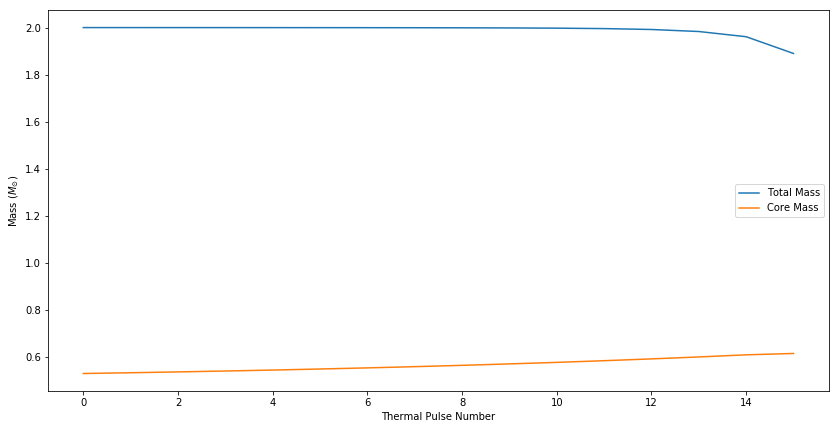

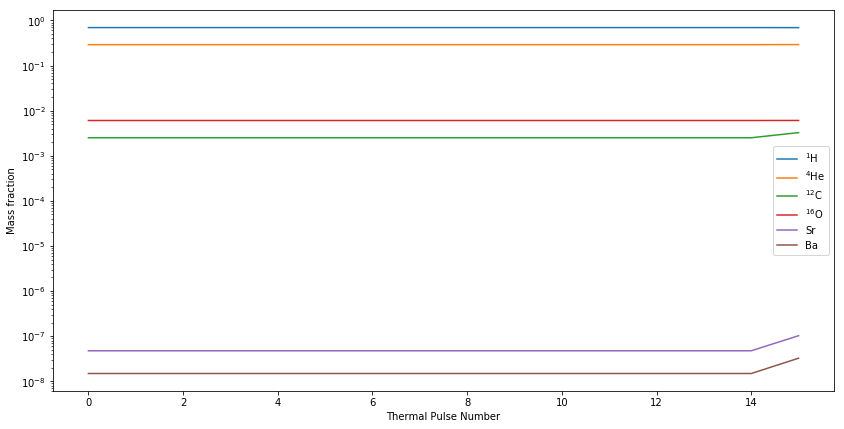

In [151]:
#Some constants
c = 2.99792*10**10
L_sun = 3.828*10**33
msun = 1.989*10**33
tyear = (365.25*24*60*60)




#Question 1
epsilon = c**2 * (4.0026-4.*1.0078)/(4.*1.0078) * L_sun**-1 * tyear**-1 * msun 
q = 1/epsilon

#How many steps we want to do
n= 100

#initialise the arrays that will hold our values
mc = np.zeros(n)
m = np.zeros(n)
menv = np.zeros(n)
poccur = np.zeros(n)

#Initial mass of the star (in msun)
m[0] = 2.0

#Composition array, how many steps we are doing by how many elements we have
x = np.zeros((n,6))

#Initial composition, in mass fraction
x[0,:] = [6.9499E-1, 2.9057E-1, 2.5055E-03, 6.0480E-03, 4.7352E-8, 1.4839E-08]

z = 1-6.9499E-1-2.9057E-1
print('z = ', z )

# Intershell abundances
# From s process lectures, A values from Apslund et al. 2009
# log10(XBastar/XBasolar) = 2.6 (as star is solar metallicity)
# XBasolar = 10**(A(Ba)-12) * Xsolar * M(Ba)
# solve for XBastar
xsrshell = 10**2.6*10**(2.87-12)*0.7*87.62
xbashell = 10**2.6*10**(2.18-12)*0.7*137.33


#Composition of the shell in mass fraction (unchanging?)
xshell = np.array([0., 0.70, 0.25, 0.01, xsrshell, xbashell])



#Our time step (time between pulses)
dt = 10**5


# variables so we can see how many dredge ups occur and how long the pulsations last
n_third_dredge = 0

i_stop = 0

# Initial core mass
mc[0] = 0.53

#Minimum core mass for 3rd dredge up to occur
mcmin = 0.608


for i in range(1,n):
    
    
    #Determining delta Mc
    
    #Luminosity from (5)
    L = 59250*(mc[i-1] - 0.490)
    

    
    #dmc/dt from (3)
    dmc = (-q*L/x[i-1,0])*dt


    # If the current core mass is greater then the minimum core mass for 3rd dredge up to occur
    # Then the core mass can change (lambda =/= 0.)
    if (mc[i-1] > mcmin):
        l = 0.4
        n_third_dredge = n_third_dredge + 1
    else:
        l = 0
    
    #Delta M dredge up from (6) where l is lambda
    dmd = l*dmc

    #Changes to the core mass by applying (7)
    mc[i] = mc[i-1] + dmc - dmd


    #Radius of AGB in solar radii from (8)
    Ragb = 1.125*m[i-1]**(-0.33)*(L**0.4 + 0.383*L**(0.76))
    

    #Pulsation period of AGB from (10)
    p = 10**(-2.07 + 1.94*np.log10(Ragb) - 0.9*np.log10(m[i-1]))
    poccur[i] = p

    #If pulsation period greater than 500 days then use (11) otherwise use (9)
    #to determine the chaqnge in change total mass of the star. Converted to cgs
    
    if (p > 500):
        dmdt = L*L_sun/(c*15*10**5) * tyear

    else:
        dmdt = 10**(-11.4 + 0.0125*p) *msun
        
    
    dmdt = dmdt*10
    
    #Change the core mass in cgs then converted to 
    m[i] = (msun * m[i-1] - dmdt * dt)/ msun
    
    
    #Mass of the envelope is defined as the total mass minus the core mass
    menv[i] = m[i] - mc[i]

    #Changes to composition of the elements in the star from (12)
    x[i,:] = (x[i-1,:]*(menv[i] - dmd) + dmd * xshell[:])/menv[i]

    
    # Our stopping condition
    # Not physical for the core mass to be greater than the star mass so stop if this happens
    if(mc[i] - m[i] > 0):
        #set the stopping time step to be the step before the core mass was greater
        #than the total mass
        i_stop = i-1
        break
        
# Straight forward to understand        
final_co = x[i_stop,2]/x[i_stop,3] * 16/12
print('Final C/O = ', final_co)


#Plotting of the results

plt.figure(figsize = (14,7))
plt.plot(m[0:i_stop], label = 'Total Mass')
plt.plot(mc[0:i_stop], label = 'Core Mass')
plt.ylabel(r'Mass $\left( M_{\odot} \right)$')
plt.xlabel('Thermal Pulse Number')
plt.legend(loc = 'best')


plt.figure(figsize = (14,7))


plt.plot(x[0:i_stop,0], label = r'$^{1}$H')
plt.plot(x[0:i_stop,1], label = r'$^{4}$He')
plt.plot(x[0:i_stop,2], label = r'$^{12}$C')
plt.plot(x[0:i_stop,3], label = r'$^{16}$O')
plt.plot(x[0:i_stop,4], label = 'Sr')
plt.plot(x[0:i_stop,5], label = 'Ba')

plt.yscale('log')
plt.ylabel('Mass fraction')
plt.xlabel('Thermal Pulse Number')
plt.legend(loc = 'best')


print('X(Sr) final / X(Sr) solar = ', x[i_stop,4]/solarsr)
print('X(Ba) final / X(Ba) solar = ', x[i_stop,5]/solarba)

print('Final Core mass = ', mc[i_stop], r'M$_{\odot}$')
print('Number of pulses = ', i_stop)
print('Number of dredges = ', n_third_dredge)

m5 = m
mc5 = mc
x5 = x

i_stop5 = i_stop
poccur5 = poccur

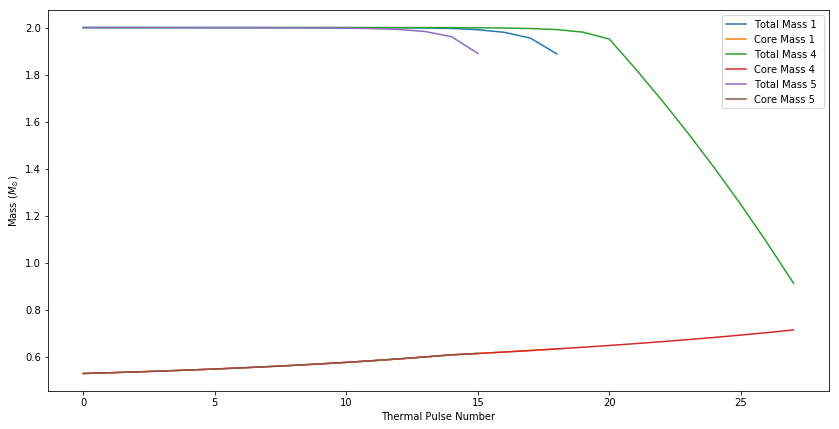

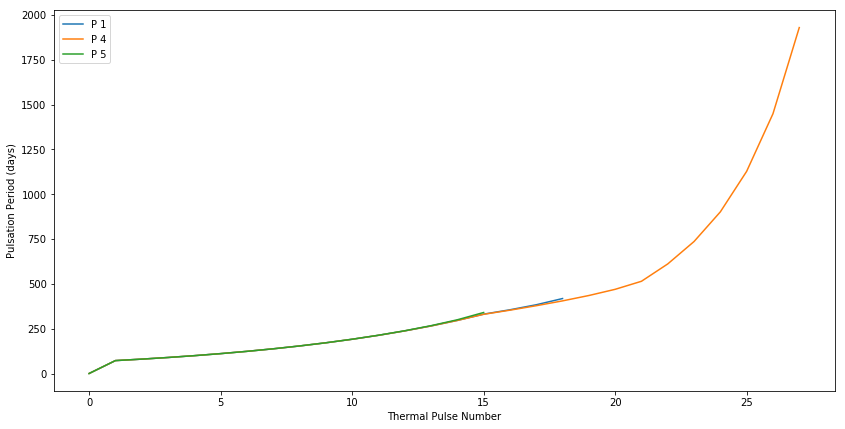

In [157]:
plt.figure(figsize = (14,7))
plt.plot(m1[0:i_stop1], label = 'Total Mass 1 ')
plt.plot(mc1[0:i_stop1], label = 'Core Mass 1')
plt.plot(m4[0:i_stop4], label = 'Total Mass 4 ')
plt.plot(mc4[0:i_stop4], label = 'Core Mass 4')
plt.plot(m5[0:i_stop5], label = 'Total Mass 5 ')
plt.plot(mc5[0:i_stop5], label = 'Core Mass 5')
plt.ylabel(r'Mass $\left( M_{\odot} \right)$')
plt.xlabel('Thermal Pulse Number')
plt.legend(loc = 'best')


           
plt.figure(figsize = (14,7))
plt.plot(poccur1[0:i_stop1], label = 'P 1')
plt.plot(poccur4[0:i_stop4], label = 'P 4')
plt.plot(poccur5[0:i_stop5], label = 'P 5')
plt.ylabel(r'Pulsation Period (days)')
plt.xlabel('Thermal Pulse Number')
plt.legend(loc = 'best')